In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress Pandas warnings
pd.options.mode.chained_assignment = None

In [2]:
#Constants
FOLDER_PATH = '/Users/AnshulSrivastava/Desktop/IPF/PI Data/'
SEED = 42

In [3]:
# Load all data
frib = pd.read_csv(FOLDER_PATH + 'FRIB.csv')
bcc = pd.read_csv(FOLDER_PATH + 'BCC.csv')
cc = pd.read_csv(FOLDER_PATH + 'CC.csv')

## Preprocessing and Visualizing Data

This is just to see what data we are dealing with here. We are trying to look at the power consumption, which is represented in a cumulative way under the `Watt Hours Received` feature. We first check for any NaN values. If present, we choose to drop those columns for now. If I come up with a better strategy for imputation that does not affect the cumulative differencing as well, maybe we can include that. For now, the number of NaN values is very small compared to the size of the data. 

The three plots below show the power consumption at each timestamp, with the cumulative aspect subtracted.

* Plot 1: Shows the power consumption for FRIB

* Plot 2: Shows the power consumption for BCC

* Plot 3: Shows the power consumption for the Computer Center

### FRIB Data

In [4]:
# Check for missing values
na_mask = frib['Watt Hours Received'].isna()
print(f'Found {na_mask.sum()} missing values in FRIB data')

Found 0 missing values in FRIB data


In [5]:
# Remove cumulative values
frib['Watt Hours Received'] = frib['Watt Hours Received'].diff()

# Drop the first row
frib = frib.dropna()

# Describe the data
print(frib['Watt Hours Received'].describe())

count    17539.000000
mean         1.934010
std          0.162084
min          0.898438
25%          1.859375
50%          1.929688
75%          2.046875
max          2.343750
Name: Watt Hours Received, dtype: float64


In [6]:
# Convert to datetime
frib['Timestamp'] = pd.to_datetime(frib['Timestamp'])
frib.dtypes

Timestamp              datetime64[ns]
Watt Hours Received           float64
dtype: object

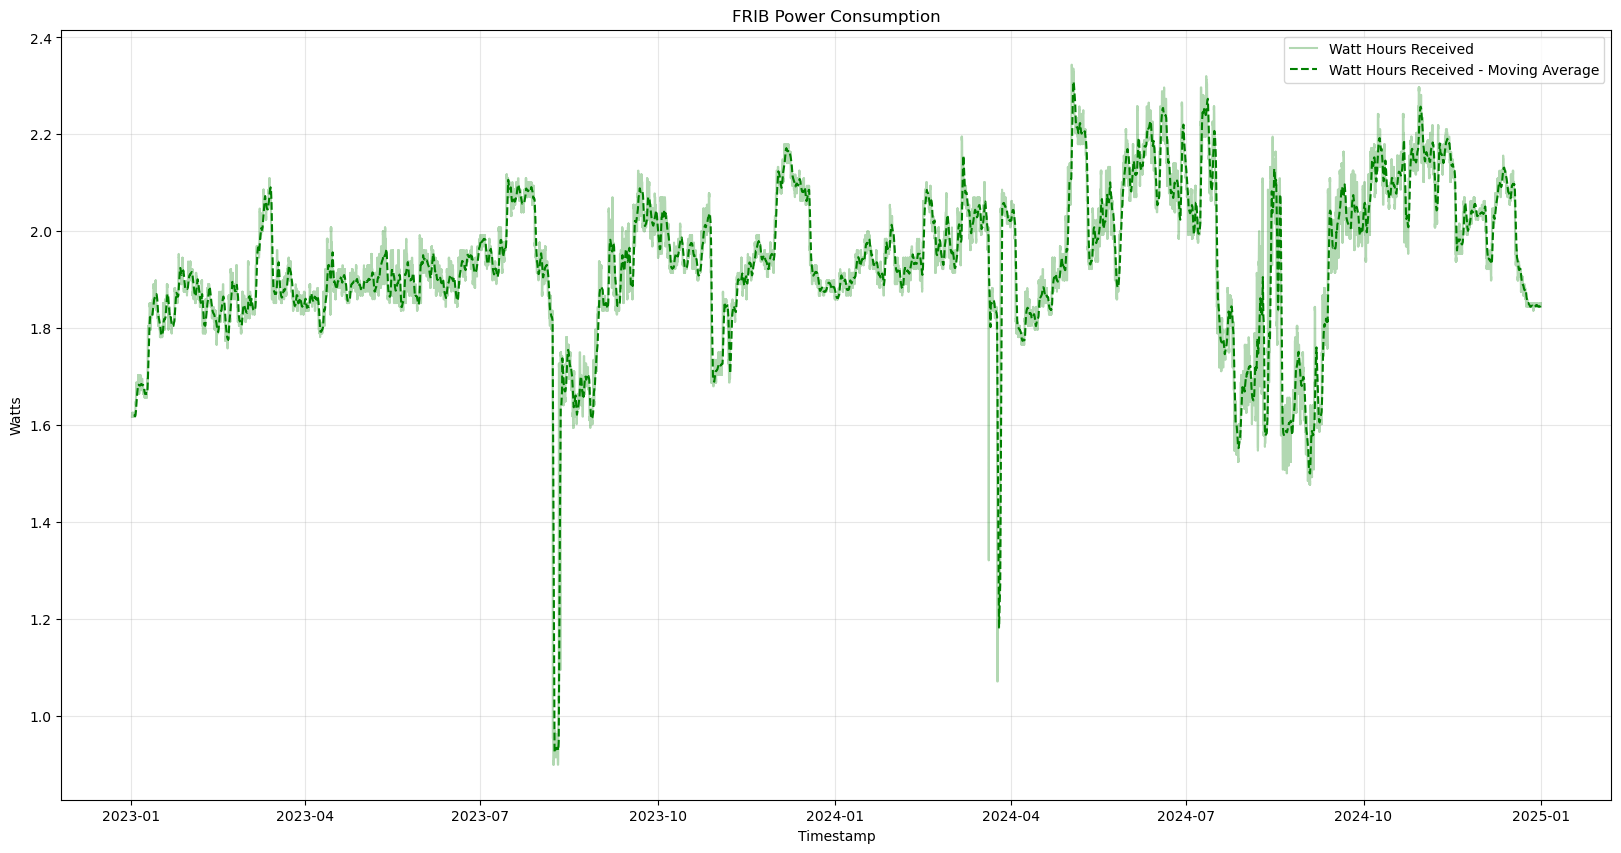

In [7]:
#Plot new wattage
plt.figure(figsize=(20,10))
plt.plot(frib['Timestamp'], frib['Watt Hours Received'], label='Watt Hours Received', color='green', alpha=0.3)

# plot moving average
plt.plot(frib['Timestamp'], frib['Watt Hours Received'].rolling(window=24).mean(), label='Watt Hours Received - Moving Average', color='green', linestyle='dashed')

plt.xlabel('Timestamp')
plt.ylabel('Watts')
plt.title('FRIB Power Consumption')
plt.legend()
plt.grid(alpha=0.3)

### BCC Data

In [8]:
#Check for NaN values
bcc['Watt Hours Received'] = pd.to_numeric(bcc['Watt Hours Received'], errors='coerce')
na_mask = bcc['Watt Hours Received'].isna()
print(f'Found {na_mask.sum()} NaN values in BCC data')

Found 18 NaN values in BCC data


In [9]:
#Drop NaN values
bcc = bcc.dropna(subset=['Watt Hours Received'])

In [10]:
# Remove cumulative values
bcc['Watt Hours Received'] = bcc['Watt Hours Received'].diff()

# Drop the first row
bcc = bcc.dropna()

# Describe the data
print(bcc['Watt Hours Received'].describe())

count    17524.000000
mean         0.104011
std          0.034822
min          0.055664
25%          0.077148
50%          0.091797
75%          0.124023
max          0.795898
Name: Watt Hours Received, dtype: float64


In [11]:
# Convert to datetime
bcc['Timestamp'] = pd.to_datetime(bcc['Timestamp'])

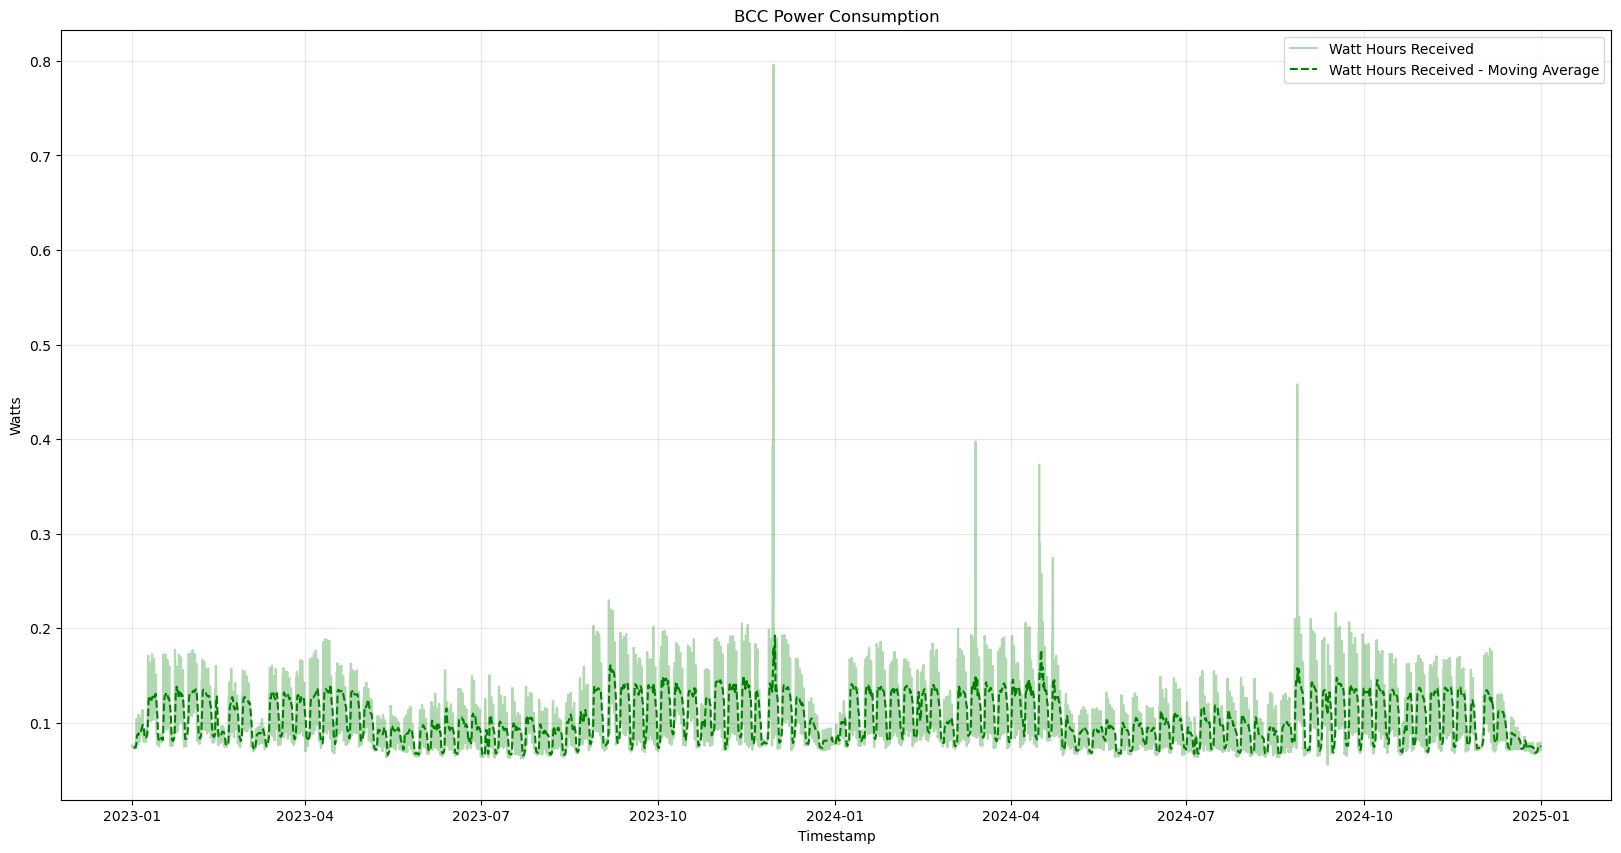

In [12]:
#Plot new wattage
plt.figure(figsize=(20,10))
plt.plot(bcc['Timestamp'], bcc['Watt Hours Received'], label='Watt Hours Received', color='green', alpha=0.3)

# plot moving average
plt.plot(bcc['Timestamp'], bcc['Watt Hours Received'].rolling(window=24).mean(), label='Watt Hours Received - Moving Average', color='green', linestyle='dashed')

plt.xlabel('Timestamp')
plt.ylabel('Watts')
plt.title('BCC Power Consumption')
plt.legend()
plt.grid(alpha=0.3)

### CC Data

In [13]:
#Check for NaN values
cc['Watt Hours Received'] = pd.to_numeric(cc['Watt Hours Received'], errors='coerce')
na_mask = cc['Watt Hours Received'].isna()
print(f'Found {na_mask.sum()} NaN values in CC data')

Found 643 NaN values in CC data


In [14]:
cc[na_mask]

,Timestamp,Watt Hours Received
942,2023-02-09 08:00:00,NaN
6132,2023-09-13 15:00:00,NaN
6133,2023-09-13 16:00:00,NaN
6134,2023-09-13 17:00:00,NaN
6135,2023-09-13 18:00:00,NaN
...,...,...
6818,2023-10-12 05:00:00,NaN
6819,2023-10-12 06:00:00,NaN
6820,2023-10-12 07:00:00,NaN
6821,2023-10-12 08:00:00,NaN


In [15]:
cc['Timestamp'] = pd.to_datetime(cc['Timestamp'])

### IMPORTANT: Readings for the Computer Center failed from 2023-09-13 to 2023-10-12. 

This leads to a huge jump in the cumulative differenced values. This data needs to be retaken. If that is not possible, then it would have to be split in two for the time being.



In [16]:
# Split the data into two parts
cc1 = cc[cc['Timestamp'] < '2023-09-13 15:00:00']
cc2 = cc[cc['Timestamp'] > '2023-10-12 09:00:00']

# Remove cumulative values
cc1['Watt Hours Received'] = cc1['Watt Hours Received'].diff()
cc2['Watt Hours Received'] = cc2['Watt Hours Received'].diff()

# Drop the first row
cc1 = cc1.dropna()
cc2 = cc2.dropna()

# Describe the data
print(cc1['Watt Hours Received'].describe())
print(cc2['Watt Hours Received'].describe())

count    6129.000000
mean        0.153045
std         0.034484
min         0.091797
25%         0.119141
50%         0.152344
75%         0.183594
max         0.234375
Name: Watt Hours Received, dtype: float64
count    10720.000000
mean         0.152584
std          0.033772
min          0.000000
25%          0.126953
50%          0.150391
75%          0.181641
max          0.234375
Name: Watt Hours Received, dtype: float64


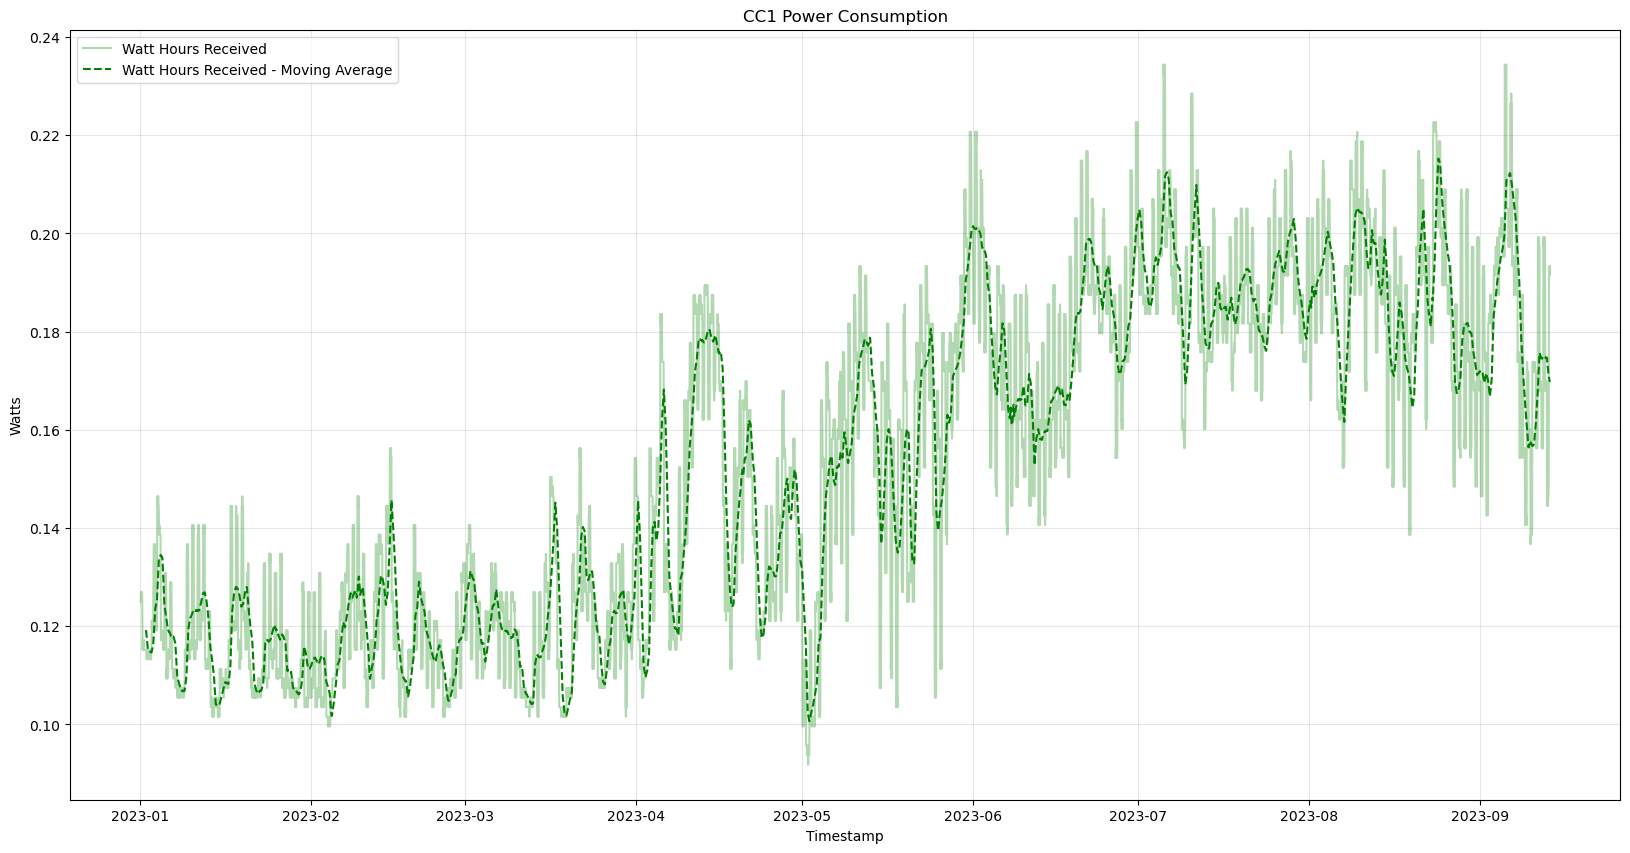

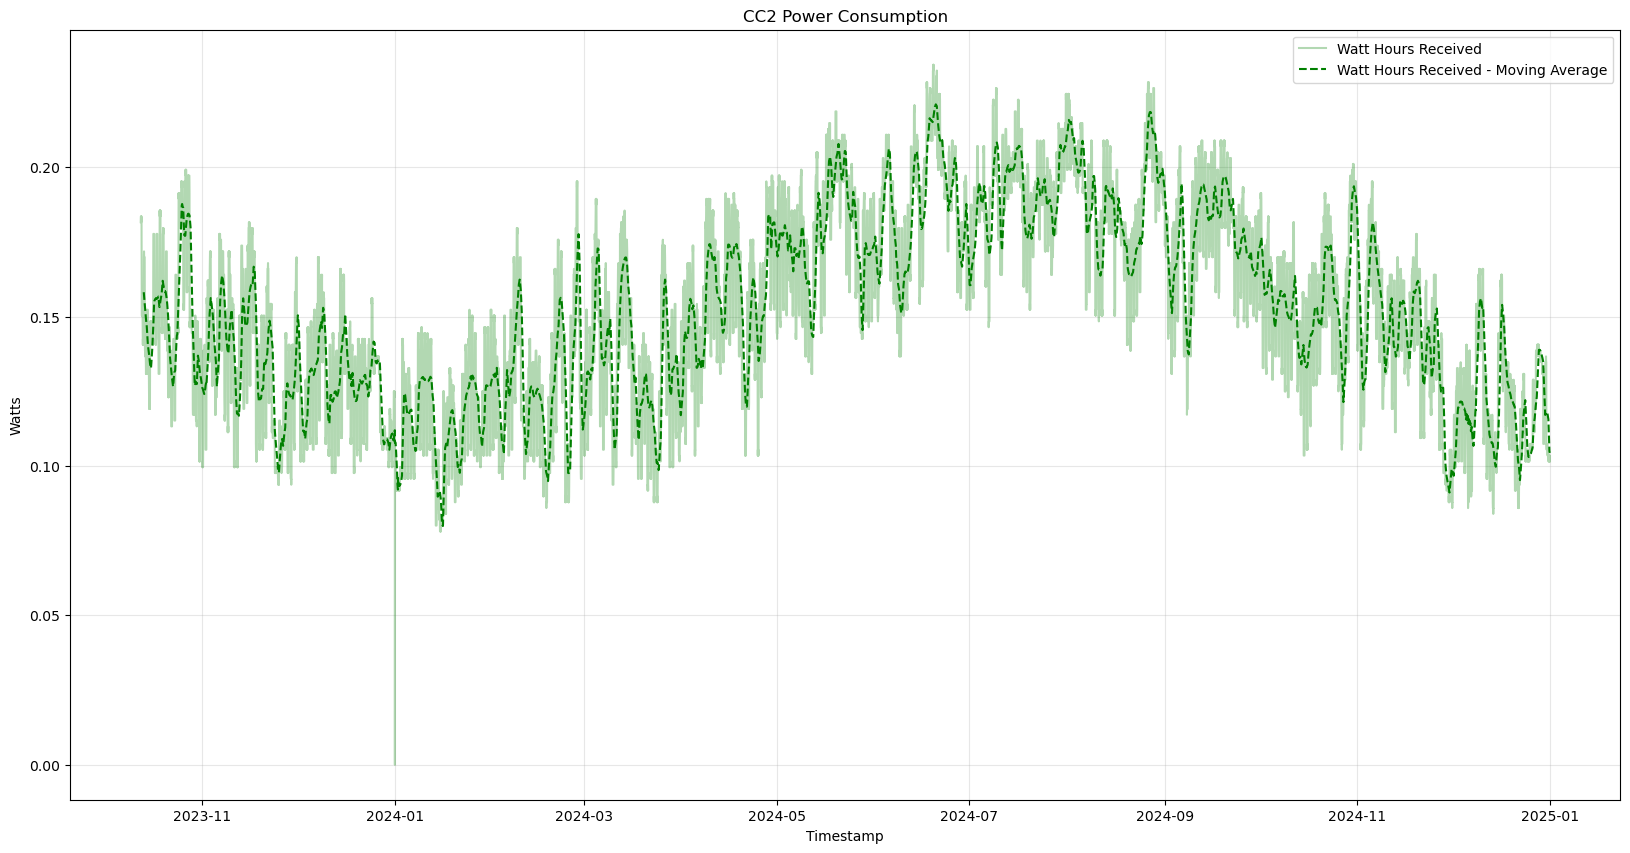

In [17]:
# Plot the data
plt.figure(figsize=(20,10))
plt.plot(cc1['Timestamp'], cc1['Watt Hours Received'], label='Watt Hours Received', color='green', alpha=0.3)

# plot moving average
plt.plot(cc1['Timestamp'], cc1['Watt Hours Received'].rolling(window=24).mean(), label='Watt Hours Received - Moving Average', color='green', linestyle='dashed')

plt.xlabel('Timestamp')
plt.ylabel('Watts')
plt.title('CC1 Power Consumption')
plt.legend()
plt.grid(alpha=0.3)

plt.figure(figsize=(20,10))
plt.plot(cc2['Timestamp'], cc2['Watt Hours Received'], label='Watt Hours Received', color='green', alpha=0.3)

# plot moving average
plt.plot(cc2['Timestamp'], cc2['Watt Hours Received'].rolling(window=24).mean(), label='Watt Hours Received - Moving Average', color='green', linestyle='dashed')

plt.xlabel('Timestamp')
plt.ylabel('Watts')
plt.title('CC2 Power Consumption')
plt.legend()
plt.grid(alpha=0.3)

## Basic Anomaly Detection

Since I do not have the details of how to classify a reading as an outlier, I decided to go with the standard statistical approach of finding **values that are more than 3 standard deviation away from the mean**.

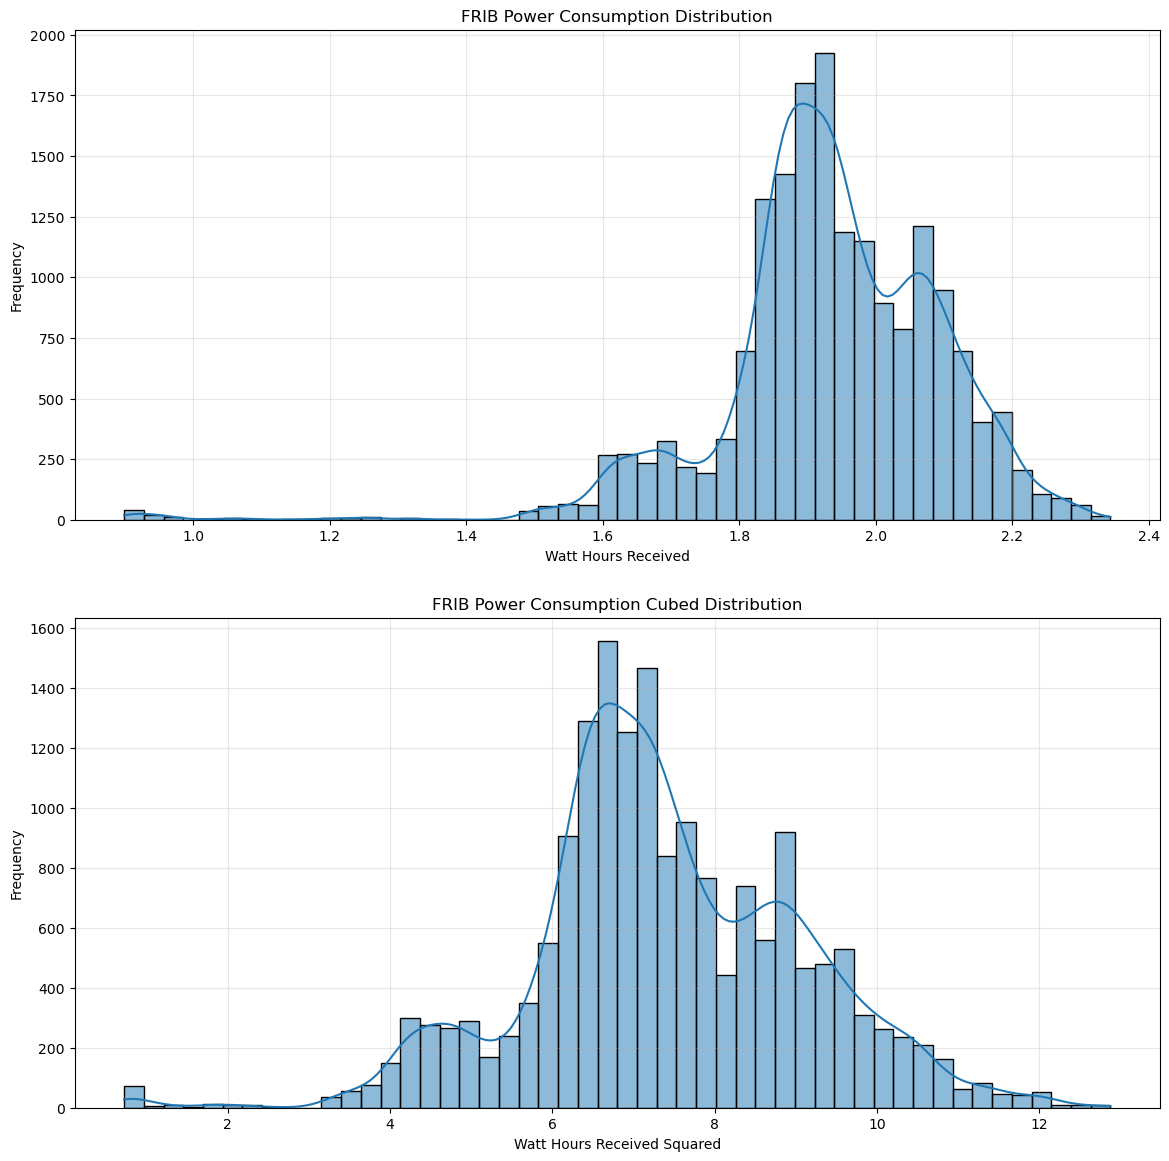

In [18]:
# Plot frequency distribution of wattage with density
plt.figure(figsize=(14,14))
plt.subplot(211)
sns.histplot(frib['Watt Hours Received'], kde=True, bins=50)
plt.xlabel('Watt Hours Received')
plt.ylabel('Frequency')
plt.title('FRIB Power Consumption Distribution')
plt.grid(alpha=0.3)

plt.subplot(212)
sns.histplot(frib['Watt Hours Received']**3, kde=True, bins=50)
plt.xlabel('Watt Hours Received Squared')
plt.ylabel('Frequency')
plt.title('FRIB Power Consumption Cubed Distribution')
plt.grid(alpha=0.3)

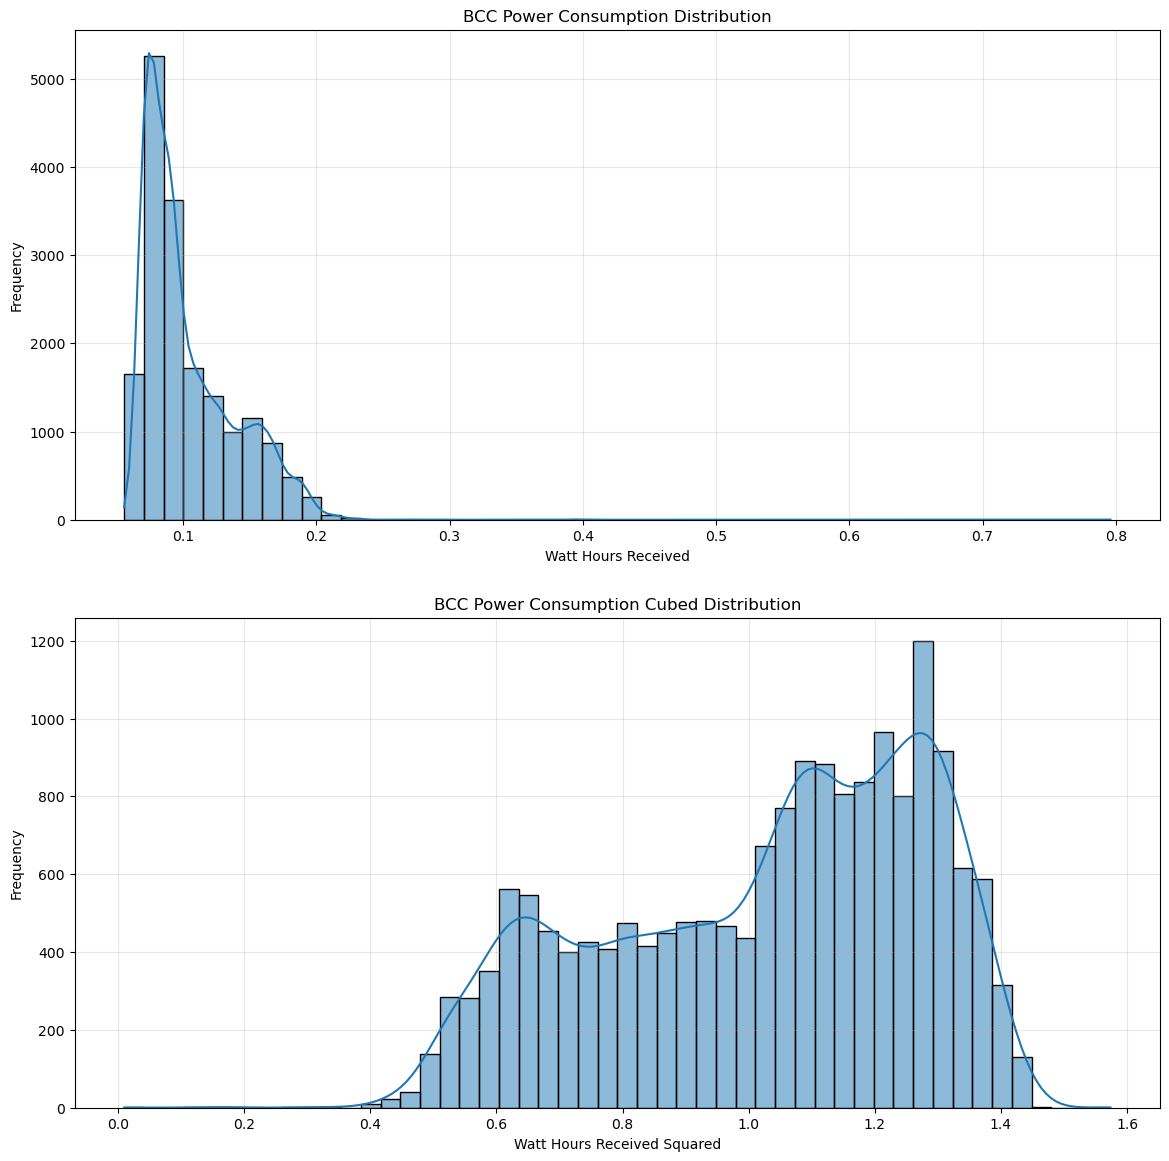

In [19]:
# Plot frequency distribution of wattage with density
plt.figure(figsize=(14,14))
plt.subplot(211)
sns.histplot(bcc['Watt Hours Received'], kde=True, bins=50)
plt.xlabel('Watt Hours Received')
plt.ylabel('Frequency')
plt.title('BCC Power Consumption Distribution')
plt.grid(alpha=0.3)

plt.subplot(212)
sns.histplot(np.abs(np.log10(bcc['Watt Hours Received']))**2, kde=True, bins=50)
plt.xlabel('Watt Hours Received Squared')
plt.ylabel('Frequency')
plt.title('BCC Power Consumption Cubed Distribution')
plt.grid(alpha=0.3)

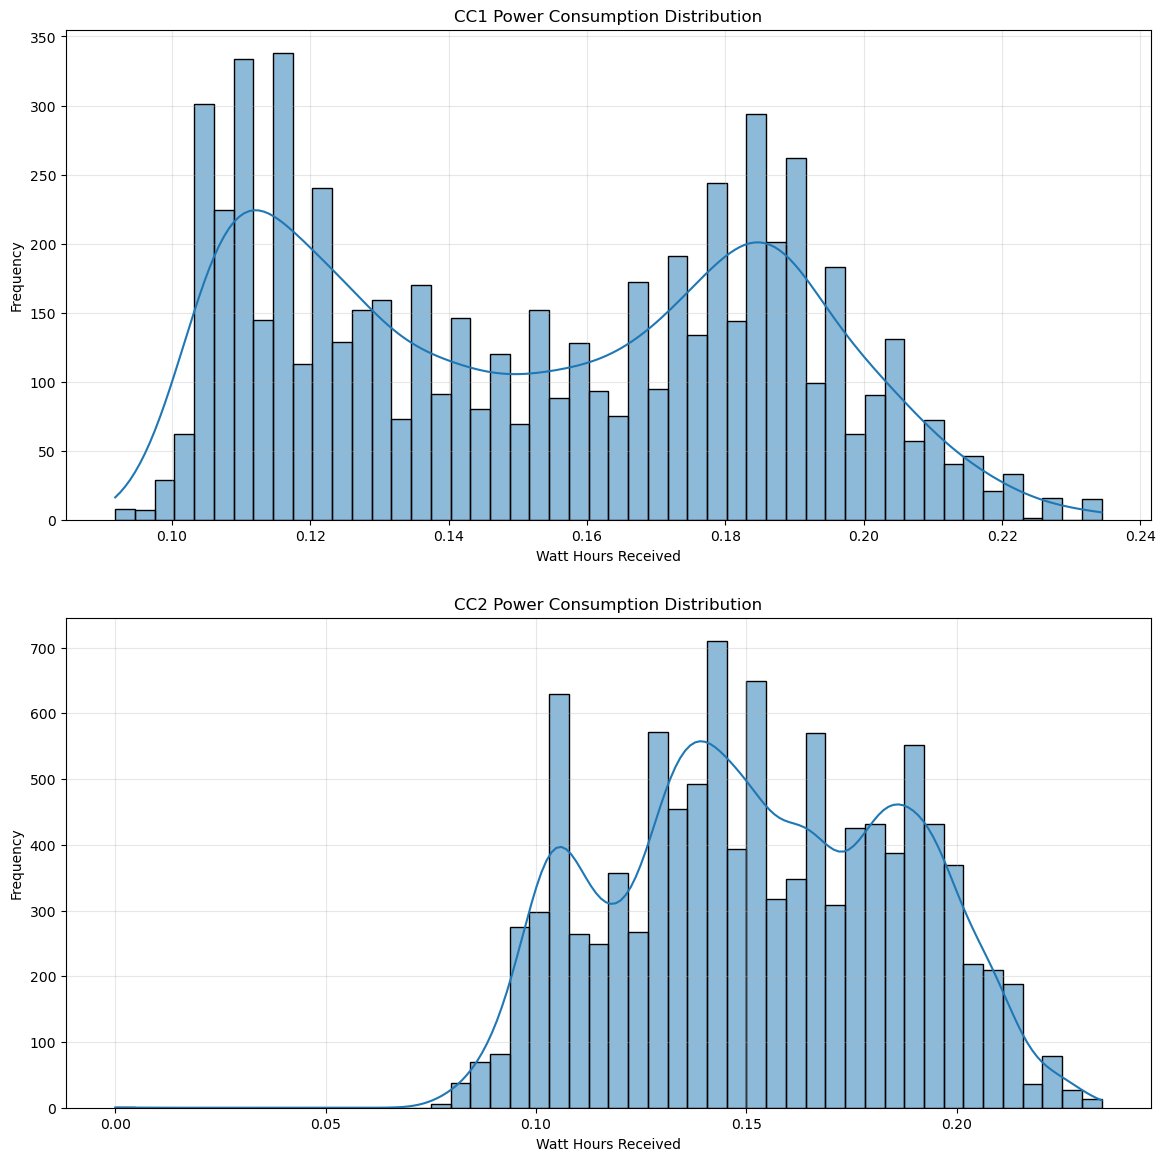

In [20]:
# Plot frequency distribution of wattage with density
plt.figure(figsize=(14,14))
plt.subplot(211)
sns.histplot(cc1['Watt Hours Received'], kde=True, bins=50)
plt.xlabel('Watt Hours Received')
plt.ylabel('Frequency')
plt.title('CC1 Power Consumption Distribution')
plt.grid(alpha=0.3)

plt.subplot(212)
sns.histplot(cc2['Watt Hours Received'], kde=True, bins=50)
plt.xlabel('Watt Hours Received')
plt.ylabel('Frequency')
plt.title('CC2 Power Consumption Distribution')
plt.grid(alpha=0.3)

FRIB looks fairly normal, so we can go ahead with the z-score approach. BCC is starting to look more uniform. So is the CC distribution. We'll deal with that later...

In [21]:
# Z-score for the FRIB data
from scipy import stats
z = np.abs(stats.zscore(frib['Watt Hours Received']))
threshold = 3
frib_outliers = frib[z > threshold]

frib_outliers

,Timestamp,Watt Hours Received
5238,2023-08-07 12:00:00,0.953125
5239,2023-08-07 13:00:00,0.953125
5240,2023-08-07 14:00:00,0.953125
5241,2023-08-07 15:00:00,0.953125
5242,2023-08-07 16:00:00,0.953125
...,...,...
10804,2024-03-26 10:00:00,1.328125
10805,2024-03-26 11:00:00,1.320312
10806,2024-03-26 12:00:00,1.320312
10807,2024-03-26 13:00:00,1.320312


## Visualizing the outliers

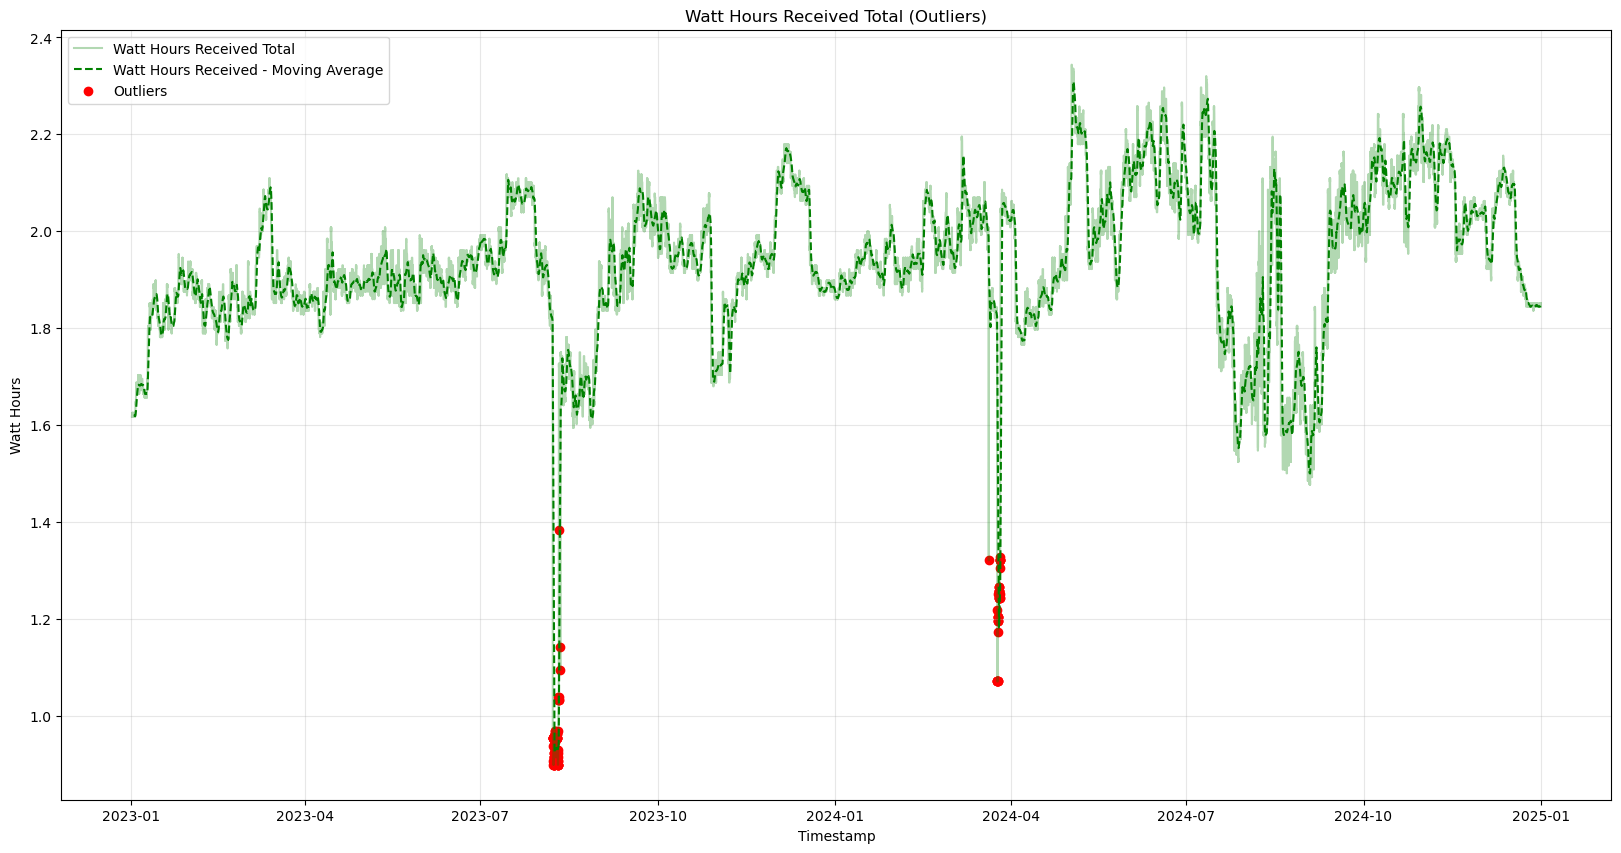

In [22]:
# Plot the outliers
plt.figure(figsize=(20,10))
plt.plot(frib['Timestamp'], frib['Watt Hours Received'], label='Watt Hours Received Total', color='green', alpha=0.3)

# plot moving average
plt.plot(frib['Timestamp'], frib['Watt Hours Received'].rolling(window=24).mean(), label='Watt Hours Received - Moving Average', color='green', linestyle='dashed')

plt.scatter(frib_outliers['Timestamp'], frib_outliers['Watt Hours Received'], color='red', label='Outliers')
plt.xlabel('Timestamp')
plt.ylabel('Watt Hours')
plt.title('Watt Hours Received Total (Outliers)')
plt.legend()
plt.grid(alpha=0.3)

## Basic Predictive Modelling - FRIB DATA

### Checking for stationarity

This approach should work well for modelling power consupmtion, since we can assume people use the same amount of energy on average. The readings may fluctuate around this average, but there would not be an increasing or decreasing pattern (ideally). This is called stationarity. If this condition is met, ARIMA can be applied.

In [23]:
# ARIMA model
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# Check for stationarity
result = adfuller(frib['Watt Hours Received'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -6.358185
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


### Results

Smaller the ADF Statistic, the more confident we can be in declaring the series to be stationary. A negative value is very good for us, as confirmed by the p-value.


### Next Steps

We do a standard train-test split, and look at a few statistics to decide the parameters for the ARIMA model.

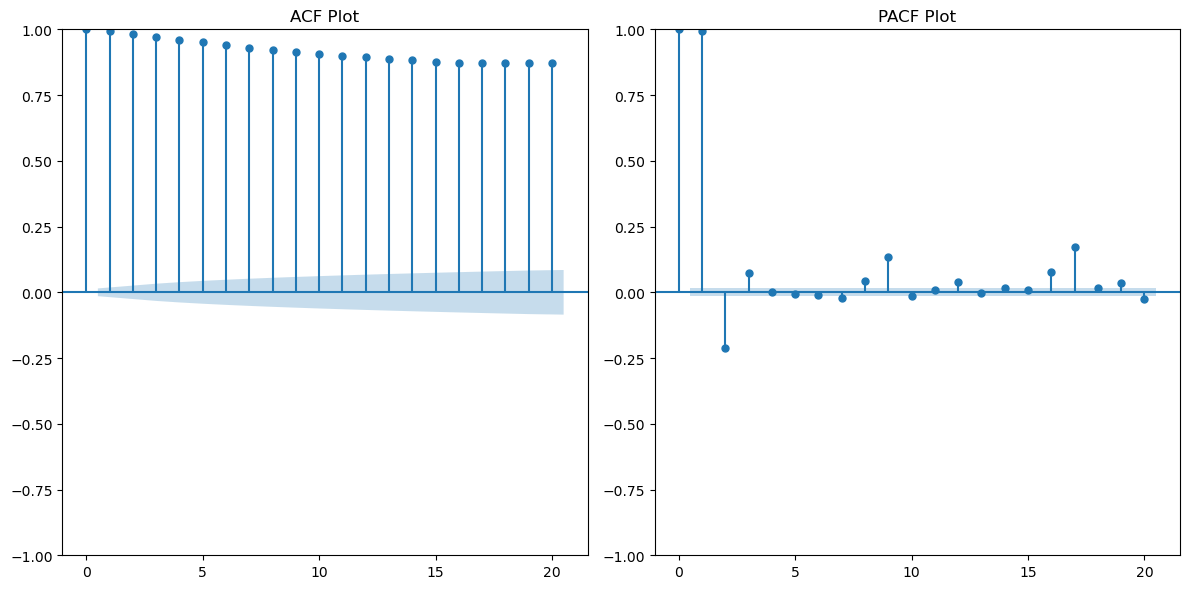

In [24]:
# Train test split
train_size = int(len(frib) * 0.92)
train, test = frib['Watt Hours Received'][:train_size].values.tolist(), frib['Watt Hours Received'][train_size:].values.tolist()

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF and PACF
plt.figure(figsize=(12, 6))

# ACF plot for q
plt.subplot(1, 2, 1)
plot_acf(frib['Watt Hours Received'], lags=20, ax=plt.gca())
plt.title('ACF Plot')

# PACF plot for p
plt.subplot(1, 2, 2)
plot_pacf(frib['Watt Hours Received'], lags=20, ax=plt.gca())
plt.title('PACF Plot')

plt.tight_layout()
plt.show()

### Interpretation

We choose values when our quantities cross over the confidence intervals. From the PACF plot, we can see it crosses over after just 1 lag. Therefore, we set p = 1. From the ACF plot, there is just gradual slope, and no cross-over. Therefore, we can just experiment with q values. We will start with q = 1. Since the time series is already stationary, we set d = 0.

## Selecting Optimal Parameters

Even though we have an idea of what parameters will work, thanks to the plots above, we will use the auto ARIMA, which iterates through a bunch of possible values for p, d, and q, and selects the combination which minimizes the AIC. This ensures we select the most optimal parameters.

In [25]:
# use auto_arima to find the best parameters
from pmdarima import auto_arima

# Fit auto_arima
model = auto_arima(train, seasonal=False, trace=True, suppress_warnings=True, error_action="ignore")
model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-80086.864, Time=3.45 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-79197.201, Time=0.69 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-79968.762, Time=0.48 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-80066.984, Time=1.75 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-79199.155, Time=0.35 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-80089.758, Time=0.74 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-80073.800, Time=2.17 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-80071.872, Time=2.12 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-80071.164, Time=8.60 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-80088.196, Time=2.66 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-80088.863, Time=0.97 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-80084.520, Time=5.54 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-80091.719, Time=0.82 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-80075.767, Time=0.61 sec
 ARIM

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                16135
Model:               SARIMAX(1, 1, 2)   Log Likelihood               40049.859
Date:                Tue, 11 Mar 2025   AIC                         -80091.719
Time:                        11:04:50   BIC                         -80060.964
Sample:                             0   HQIC                        -80081.551
                              - 16135                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5853      0.097      6.033      0.000       0.395       0.775
ma.L1         -0.3505      0.097     -3.605      0.000      -0.541      -0.160
ma.L2         -0.1685      0.022     -7.587      0.000      -0.212      -0.125
sigma2         0.0004   5.19e-07    786.494      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):          29183862.17
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               2.01   Skew:                            -3.12
Prob(H) (two-sided):                  0.00   Kurtosis:                       211.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Interpretation

We end up with (1, 1, 2) as the optimal model. Here is what that means:

- The model is using a lag of 1. This means only the previous time step is used to predict the current time step.

- The model applies a differencing of order 1. This means that the model thought there was some trend or seasonality still present in the series.

- The model using a moving average order of 2. This means it uses the forecast errors of the past two predictions to help make the next prediction.

### Predicting the Next Hour

In [27]:
from sklearn.metrics import mean_squared_error
import numpy as np
from tqdm.notebook import tqdm

# # Train test split
# train_size = int(len(frib) * 0.92)
# train, test = frib['Watt Hours Received'][:train_size].values.tolist(), frib['Watt Hours Received'][train_size:].values.tolist()

# #Iterate through the test set for dynamic forecasting
# predictions = []
# for t in tqdm(range(len(test))):
#     model = ARIMA(train, order=(1, 1, 2), enforce_stationarity=False, enforce_invertibility=False) 
#     model_fit = model.fit()
#     yhat = model_fit.forecast(steps=1)[0]
#     predictions.append(yhat)
#     obs = test[t]
#     train.append(obs)

In [234]:
# Calculate RMSE
error = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % error)

Test RMSE: 0.012


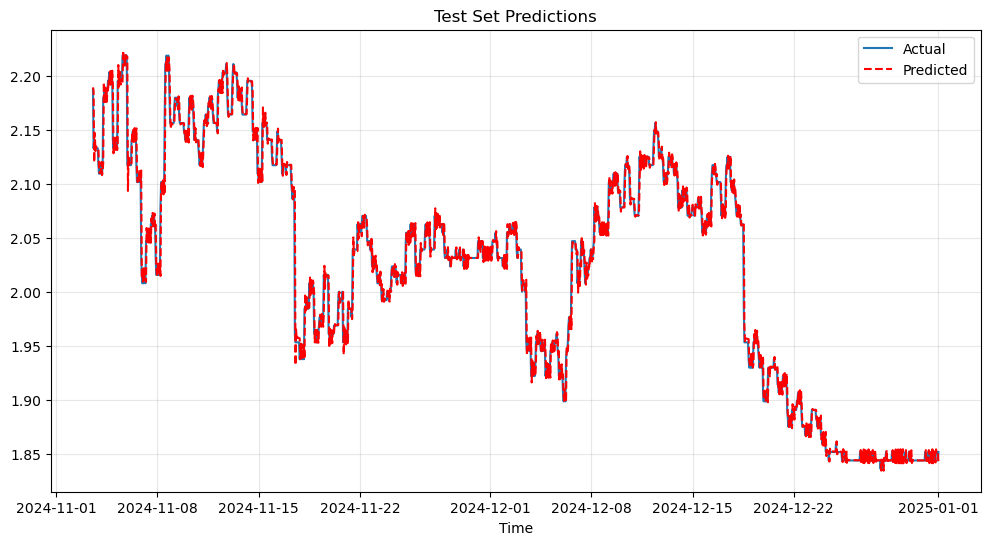

In [236]:
# Plot test predictions vs actual
plt.figure(figsize=(12, 6))
plt.plot(frib['Timestamp'][train_size:], test, label='Actual')
plt.plot(frib['Timestamp'][train_size:], predictions, color='red', label='Predicted', linestyle='dashed')
plt.title('Test Set Predictions')
plt.xlabel('Time')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

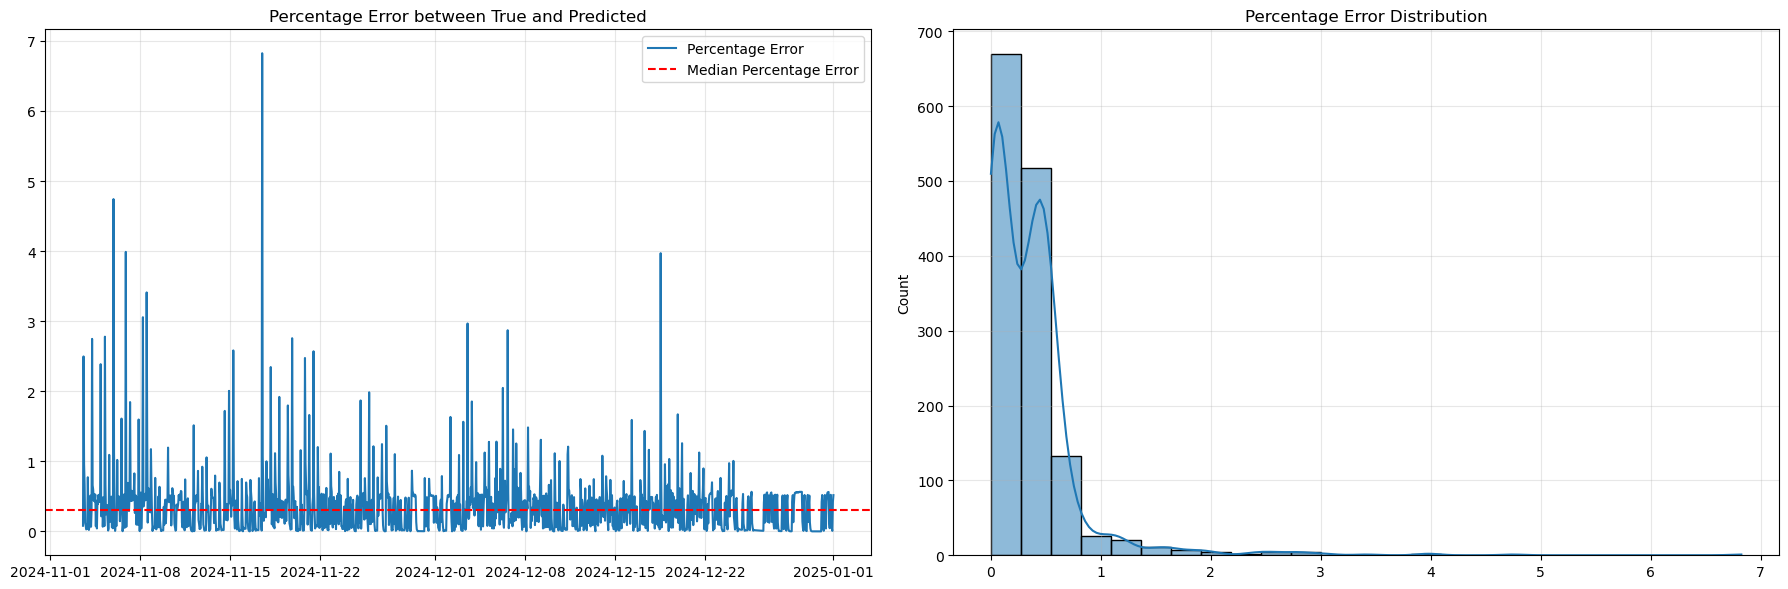

In [237]:
# Plot difference between true and predicted values
plt.figure(figsize=(18, 6))
plt.subplot(121)
plt.plot(frib['Timestamp'].loc[train_size+1:], np.abs(np.array(test) - np.array(predictions))/np.array(test)*100, label='Percentage Error')
plt.axhline(np.median(np.abs(np.array(test) - np.array(predictions))/np.array(test)*100), color='red', linestyle='dashed', label='Median Percentage Error')
plt.title('Percentage Error between True and Predicted')
plt.grid(alpha=0.3)
plt.legend()

plt.subplot(122)
sns.histplot(np.abs(np.array(test) - np.array(predictions))/np.array(test)*100, label='Percentage Error', kde=True, bins=25)
plt.title('Percentage Error Distribution')
plt.grid(alpha=0.3)

plt.tight_layout()

### Predicting the Next 10 Hours

In [28]:
#Iterate through the test set for dynamic forecasting every 10 steps
predictions = []
train, test = frib['Watt Hours Received'][:train_size].values.tolist(), frib['Watt Hours Received'][train_size:].values.tolist()

for t in tqdm(range(0, len(test), 10)):
    model = ARIMA(train, order=(1, 1, 2), enforce_stationarity=False, enforce_invertibility=False) 
    model_fit = model.fit()
    yhat = model_fit.forecast(steps=10)
    predictions.extend(yhat)
    obs = test[t:t+10]
    train.extend(obs)

  0%|          | 0/141 [00:00<?, ?it/s]

/Users/AnshulSrivastava/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/AnshulSrivastava/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/AnshulSrivastava/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/AnshulSrivastava/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/AnshulSrivast

In [29]:
# Calculate RMSE using every 10th step
error = np.sqrt(mean_squared_error(test, predictions[0:1404]))
print('Test RMSE: %.3f' % error)

Test RMSE: 0.028


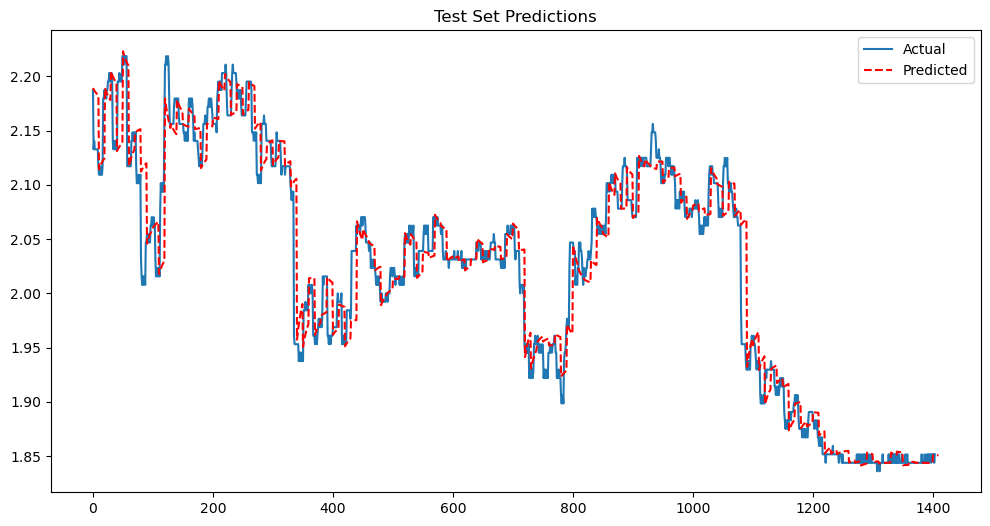

In [30]:
# Plot test predictions vs actual
plt.figure(figsize=(12, 6))
plt.plot(test, label='Actual')
plt.plot(predictions, color='red', label='Predicted', linestyle='dashed')
plt.title('Test Set Predictions')
plt.legend()
plt.show()

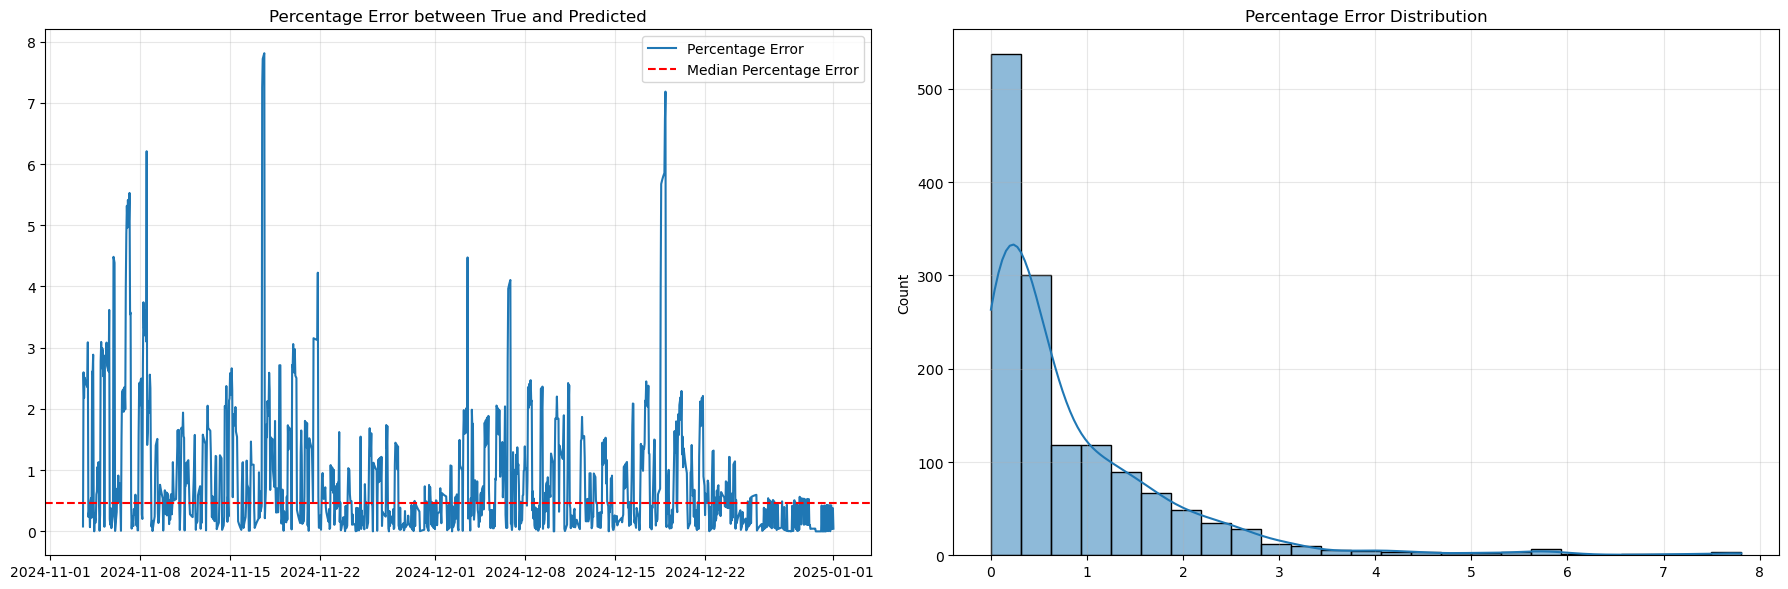

In [31]:
# Plot difference between true and predicted values
plt.figure(figsize=(18, 6))
plt.subplot(121)
plt.plot(frib['Timestamp'].loc[train_size+1:], np.abs(np.array(test) - np.array(predictions[0:1404]))/np.array(test)*100, label='Percentage Error')
plt.axhline(np.median(np.abs(np.array(test) - np.array(predictions[0:1404]))/np.array(test)*100), color='red', linestyle='dashed', label='Median Percentage Error')
plt.title('Percentage Error between True and Predicted')
plt.grid(alpha=0.3)
plt.legend()

plt.subplot(122)
sns.histplot(np.abs(np.array(test) - np.array(predictions[0:1404]))/np.array(test)*100, label='Percentage Error', kde=True, bins=25)
plt.title('Percentage Error Distribution')
plt.grid(alpha=0.3)

plt.tight_layout()

In [32]:
len(predictions), len(test)

(1410, 1404)

### Predicting the next 24 hours

In [201]:
train_size = int(len(frib) * 0.92)
train, test = frib['Watt Hours Received'][:train_size].values.tolist(), frib['Watt Hours Received'][train_size:].values.tolist()

predictions = []
for t in tqdm(range(0, len(test), 24)):
    model = ARIMA(train, order=(1, 1, 2), enforce_stationarity=False, enforce_invertibility=False) 
    model_fit = model.fit()
    yhat = model_fit.forecast(steps=24, dynamic=True)
    predictions.extend(yhat)
    obs = test[t:t+24]
    train.extend(obs)

  0%|          | 0/59 [00:00<?, ?it/s]

/Users/AnshulSrivastava/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [203]:
# Calculate RMSE using every 24th step
error = np.sqrt(mean_squared_error(test, predictions[0:1404]))
print('Test RMSE: %.3f' % error)

Test RMSE: 0.034


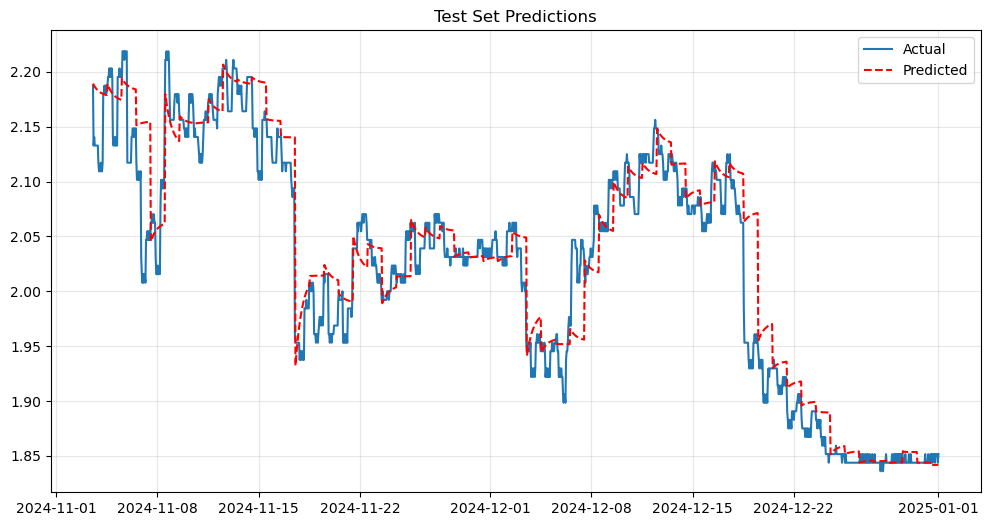

In [204]:
# Plot test predictions vs actual
plt.figure(figsize=(12, 6))
plt.plot(frib['Timestamp'][train_size:], test, label='Actual')
plt.plot(frib['Timestamp'][train_size:], predictions[0:1404], color='red', label='Predicted', linestyle='dashed')
plt.title('Test Set Predictions')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

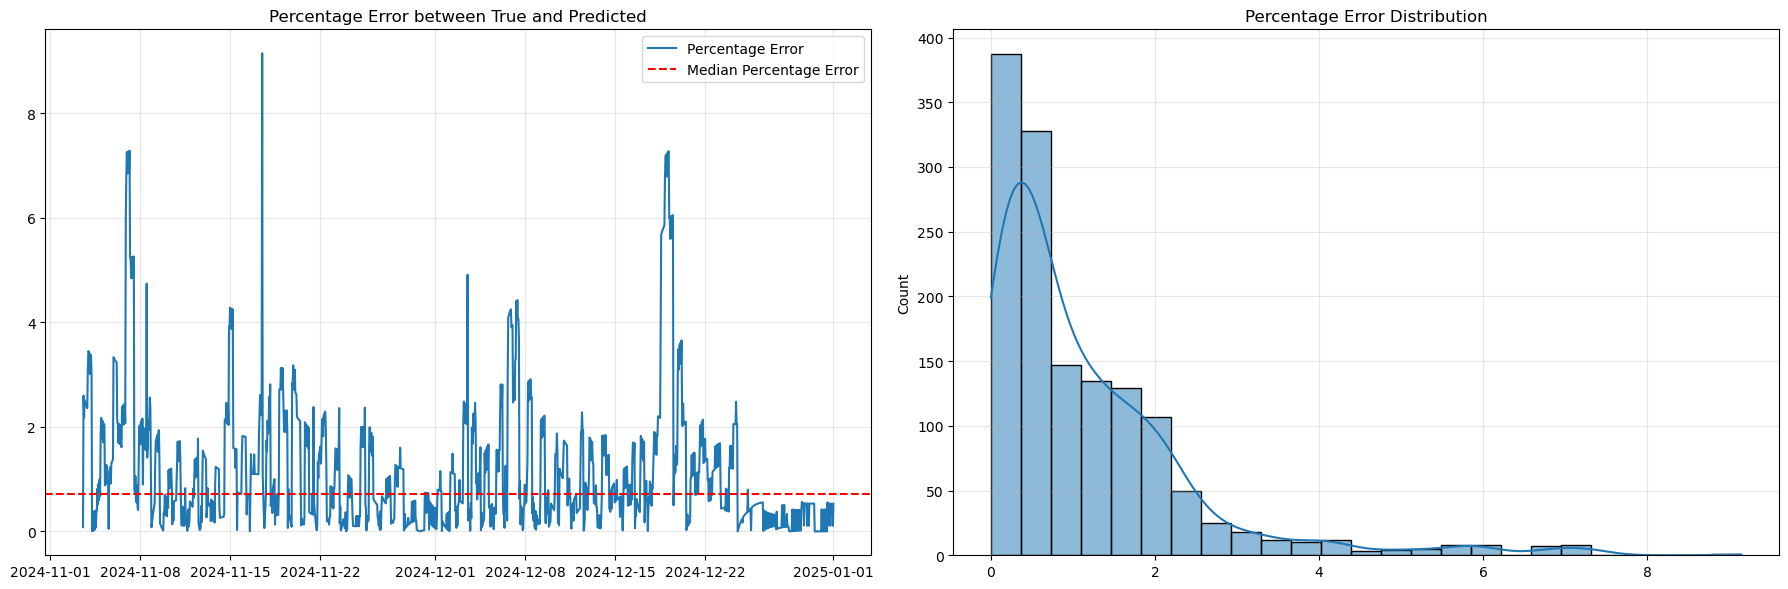

In [205]:
# Plot difference between true and predicted values
plt.figure(figsize=(18, 6))
plt.subplot(121)
plt.plot(frib['Timestamp'].loc[train_size+1:], np.abs(np.array(test) - np.array(predictions[0:1404]))/np.array(test)*100, label='Percentage Error')
plt.axhline(np.median(np.abs(np.array(test) - np.array(predictions[0:1404]))/np.array(test)*100), color='red', linestyle='dashed', label='Median Percentage Error')
plt.title('Percentage Error between True and Predicted')
plt.grid(alpha=0.3)
plt.legend()

plt.subplot(122)
sns.histplot(np.abs(np.array(test) - np.array(predictions[0:1404]))/np.array(test)*100, label='Percentage Error', kde=True, bins=25)
plt.title('Percentage Error Distribution')
plt.grid(alpha=0.3)

plt.tight_layout()

### Interpretation
Overall, the predictions for the next 24 hours do not look bad - the errors are fairly small, with a median error of ~1%. However, I do think the predictions miss some of the fluctuations present in the test set.

I would also like to see how good this model is at predicting the daily average power consumption.

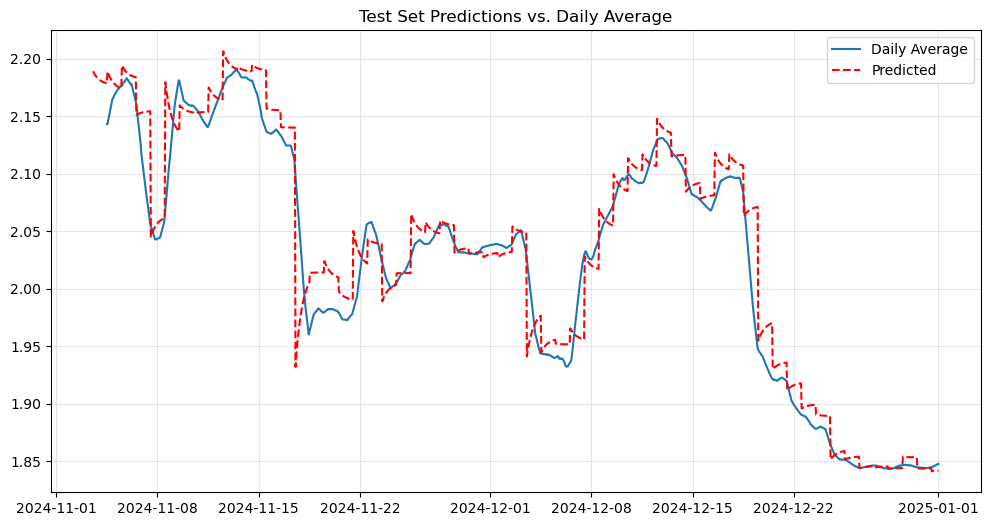

In [206]:
# Plot prediction vs. daily average
plt.figure(figsize=(12, 6))
plt.plot(frib['Timestamp'][train_size:], pd.Series(test).rolling(window=24).mean(), label='Daily Average')
plt.plot(frib['Timestamp'][train_size:], predictions[0:1404], color='red', label='Predicted', linestyle='dashed')
plt.title('Test Set Predictions vs. Daily Average')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

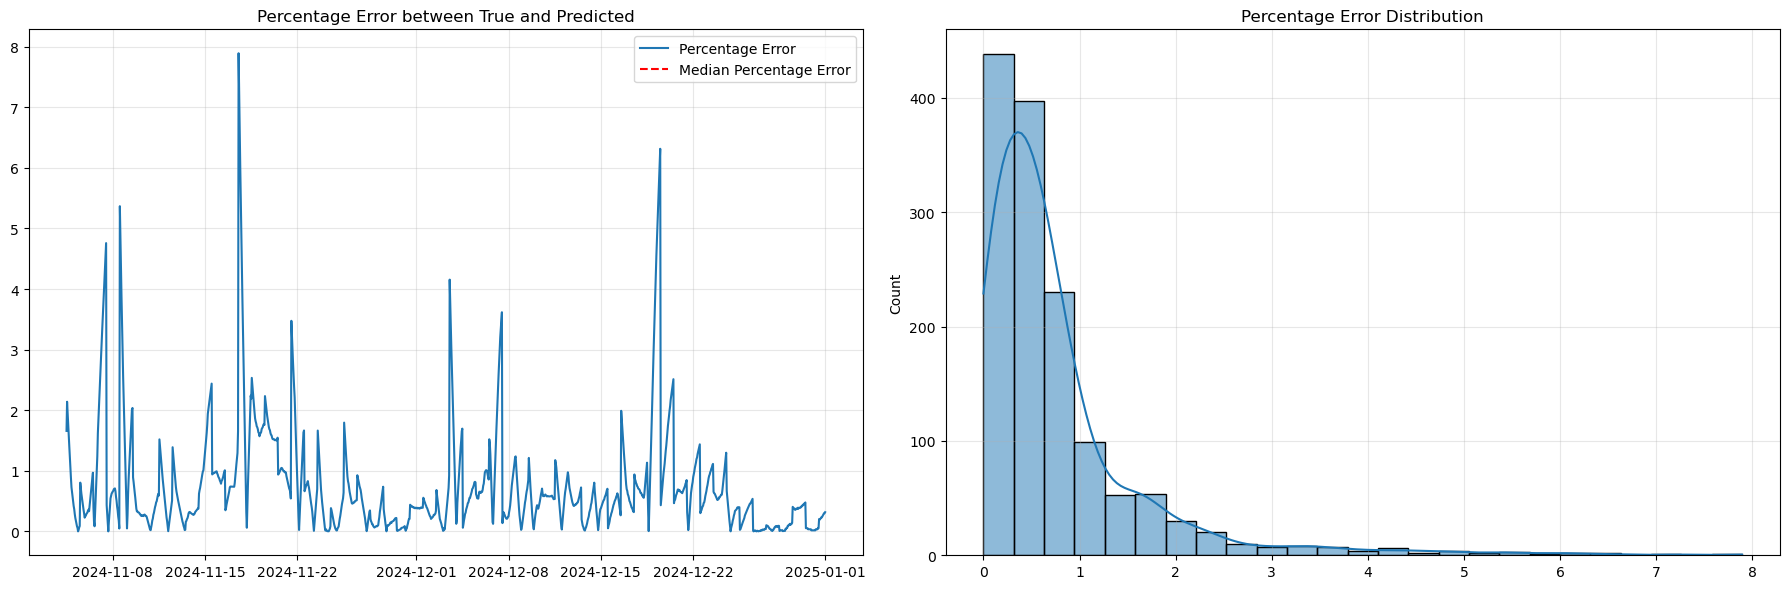

In [208]:
# Plot difference between true and predicted values
plt.figure(figsize=(18, 6))
plt.subplot(121)
plt.plot(frib['Timestamp'].loc[train_size+1:], np.abs((pd.Series(test).rolling(window=24).mean()) - np.array(predictions[0:1404]))/(pd.Series(test).rolling(window=24).mean())*100, label='Percentage Error')
plt.axhline(np.median(np.abs((pd.Series(test).rolling(window=24).mean()) - np.array(predictions[0:1404]))/(pd.Series(test).rolling(window=24).mean())*100), color='red', linestyle='dashed', label='Median Percentage Error')
plt.title('Percentage Error between True and Predicted')
plt.grid(alpha=0.3)
plt.legend()

plt.subplot(122)
sns.histplot(np.abs(np.array(pd.Series(test).rolling(window=24).mean()) - np.array(predictions[0:1404]))/np.array(pd.Series(test).rolling(window=24).mean())*100, label='Percentage Error', kde=True, bins=25)
plt.title('Percentage Error Distribution')
plt.grid(alpha=0.3)

plt.tight_layout()

### Testing the Breaking Point of the ARIMA Models

In [209]:
# Forecasting for the next week
train_size = int(len(frib) * 0.7)
train, test = frib['Watt Hours Received'][:train_size].values.tolist(), frib['Watt Hours Received'][train_size:].values.tolist()

predictions = []
for t in tqdm(range(0, len(test), 24*7)):
    model = ARIMA(train, order=(1, 1, 2), enforce_stationarity=False, enforce_invertibility=False) 
    model_fit = model.fit()
    yhat = model_fit.forecast(steps=24*7, dynamic=True)
    predictions.extend(yhat)
    obs = test[t:t+(24*7)]
    train.extend(obs)

  0%|          | 0/32 [00:00<?, ?it/s]

/Users/AnshulSrivastava/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


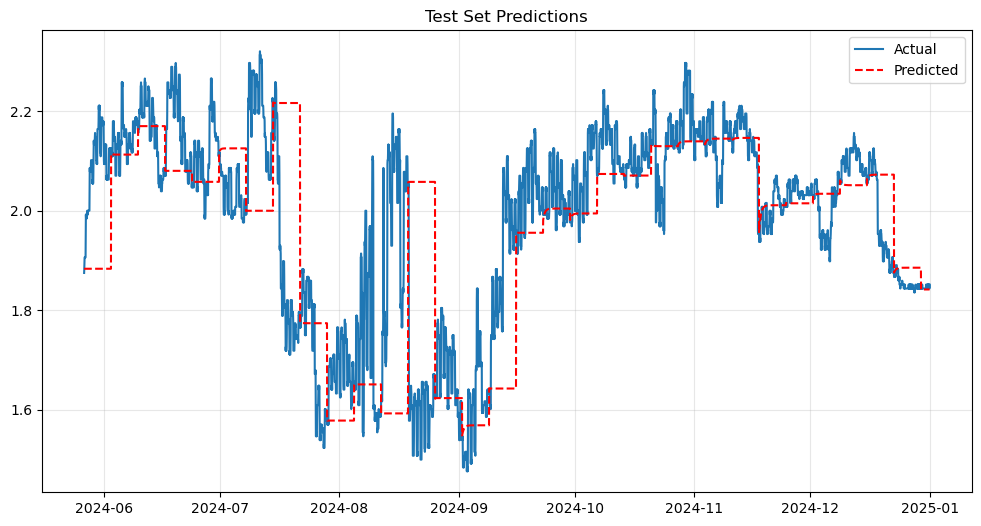

In [211]:
# Plot test predictions vs actual
plt.figure(figsize=(12, 6))
plt.plot(frib['Timestamp'][train_size:], test, label='Actual')
plt.plot(frib['Timestamp'][train_size:], predictions[0:5262], color='red', label='Predicted', linestyle='dashed')
plt.title('Test Set Predictions')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

In [212]:
# Calculate RMSE using every week
error = np.sqrt(mean_squared_error(test, predictions[0:5262]))
print('Test RMSE: %.3f' % error)

Test RMSE: 0.169


### Baseline Forecasting Model

For this part, I decide to simply use the reading at time $t-1$ as the prediction at time $t$. This simply means we expect what happened before to continue happening. A good model should strike a balance between reducing the error from this model while also being computationally efficient.

In [43]:
# Use previous time step to generate baseline predictions
train_size = int(len(frib) * 0.8)
train, test = frib['Watt Hours Received'][:train_size].values.tolist(), frib['Watt Hours Received'][train_size:].values.tolist()

predictions = []
for t in range(1, len(test)):
    yhat = test[t-1]
    predictions.append(yhat)

# Calculate RMSE
error = np.sqrt(mean_squared_error(test[1:], predictions))
print('Test RMSE: %.3f' % error)

Test RMSE: 0.025


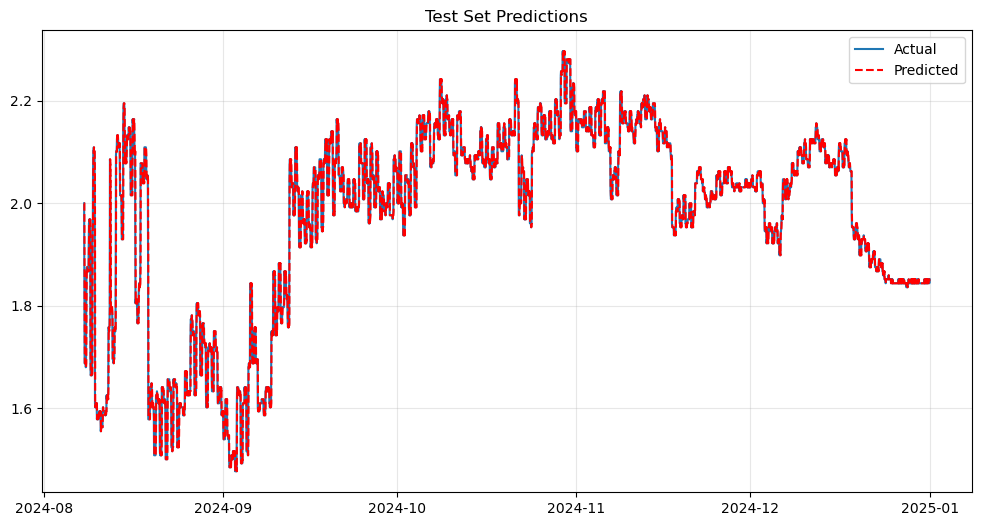

In [44]:
# Plot test predictions vs actual
plt.figure(figsize=(12, 6))
plt.plot(frib['Timestamp'][train_size+1:], test[1:], label='Actual')
plt.plot(frib['Timestamp'][train_size+1:], predictions, color='red', label='Predicted', linestyle='dashed')
plt.title('Test Set Predictions')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

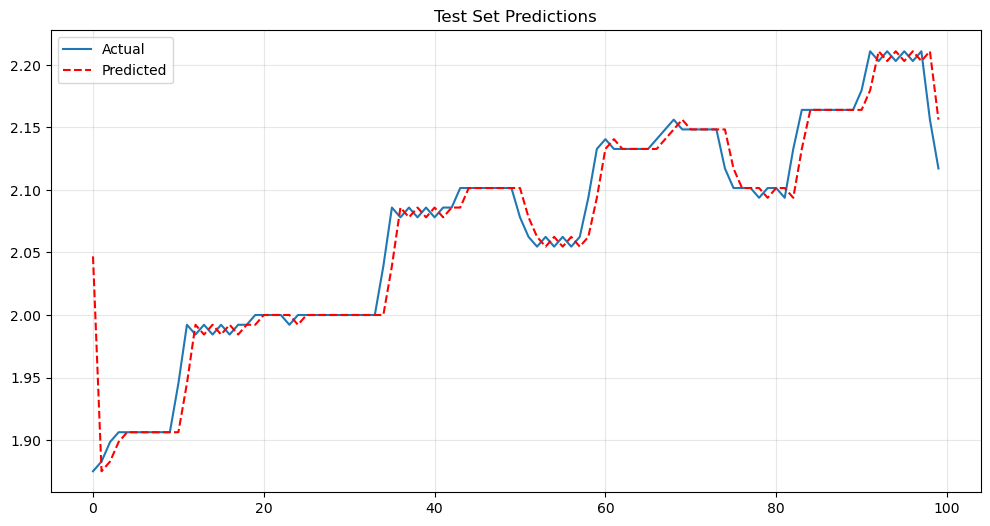

In [229]:
# Plot test predictions vs actual
plt.figure(figsize=(12, 6))
plt.plot(test[:100], label='Actual')
plt.plot(predictions[:100], color='red', label='Predicted', linestyle='dashed')
plt.title('Test Set Predictions')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

## Predictive Modelling - BCC Data

In [150]:
# Check for stationarity
result = adfuller(bcc['Watt Hours Received'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -15.603555
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


Encouraging results...

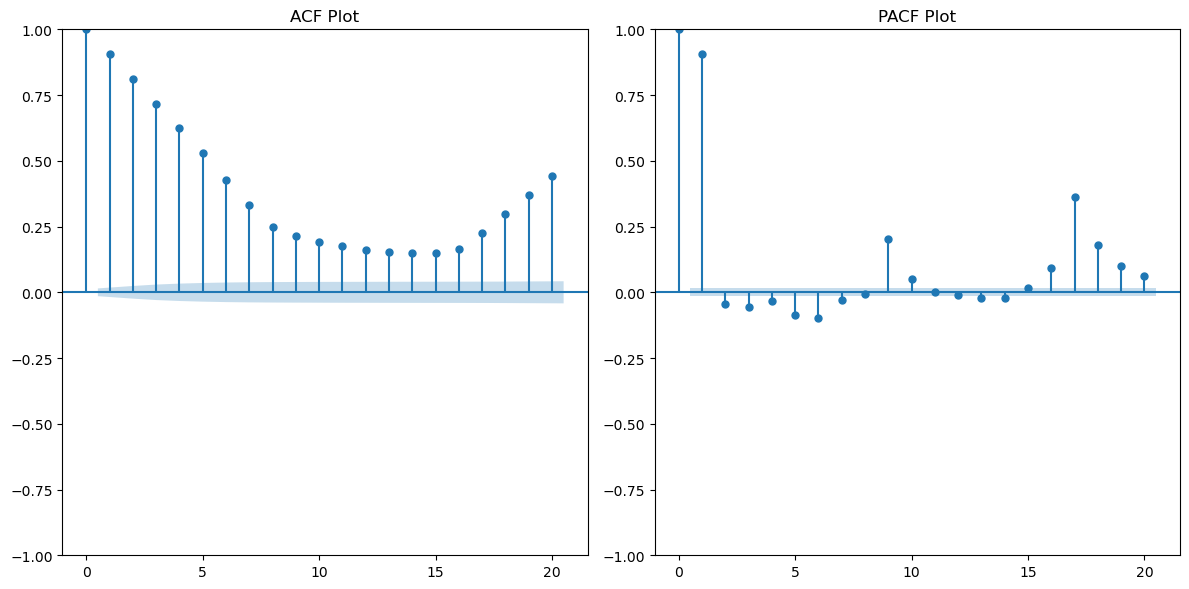

In [157]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))

# ACF plot for q
plt.subplot(1, 2, 1)
plot_acf(bcc['Watt Hours Received'], lags=20, ax=plt.gca())
plt.title('ACF Plot')

# PACF plot for p
plt.subplot(1, 2, 2)
plot_pacf(bcc['Watt Hours Received'], lags=20, ax=plt.gca())
plt.title('PACF Plot')

plt.tight_layout()
plt.show()

In [152]:
# Train test split
train_size = int(len(bcc) * 0.92)
bcc_train, bcc_test = bcc['Watt Hours Received'][:train_size].values.tolist(), bcc['Watt Hours Received'][train_size:].values.tolist()

# Fit auto_arima
model = auto_arima(bcc_train, trace=True, suppress_warnings=True, error_action="ignore")
model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-88736.223, Time=2.80 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-88744.224, Time=1.24 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-88744.231, Time=0.73 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-88744.217, Time=1.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-88746.224, Time=0.38 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-88711.945, Time=4.44 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 10.808 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                16122
Model:               SARIMAX(0, 1, 0)   Log Likelihood               44374.112
Date:                Thu, 06 Feb 2025   AIC                         -88746.224
Time:                        19:59:10   BIC                         -88738.536
Sample:                             0   HQIC                        -88743.682
                              - 16122                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0002   1.73e-07   1374.179      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   2.01   Jarque-Bera (JB):         146186987.85
Prob(Q):                              0.16   Prob(JB):                         0.00
Heteroskedasticity (H):               2.12   Skew:                            -2.23
Prob(H) (two-sided):                  0.00   Kurtosis:                       469.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Even though this suggests to use (0, 1, 0) but that just means using a random walk model. We'll go with the next best thing - (2, 1, 2)

In [153]:
# Iterate through the test set for dynamic forecasting every 10 steps
predictions = []
for t in tqdm(range(0, len(bcc_test), 10)):
    model = ARIMA(bcc_train, order=(2, 1, 2), enforce_stationarity=False, enforce_invertibility=False) 
    model_fit = model.fit()
    yhat = model_fit.forecast(steps=10)
    predictions.extend(yhat)
    obs = bcc_test[t:t+10]
    bcc_train.extend(obs)

  0%|          | 0/141 [00:00<?, ?it/s]

/Users/AnshulSrivastava/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/AnshulSrivastava/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/AnshulSrivastava/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/AnshulSrivastava/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/AnshulSrivast

In [154]:
len(predictions), len(bcc_test)

(1410, 1402)

In [155]:
# Calculate RMSE using every 10th step
error = np.sqrt(mean_squared_error(bcc_test, predictions[0:1402]))
print('Test RMSE: %.3f' % error)

Test RMSE: 0.028


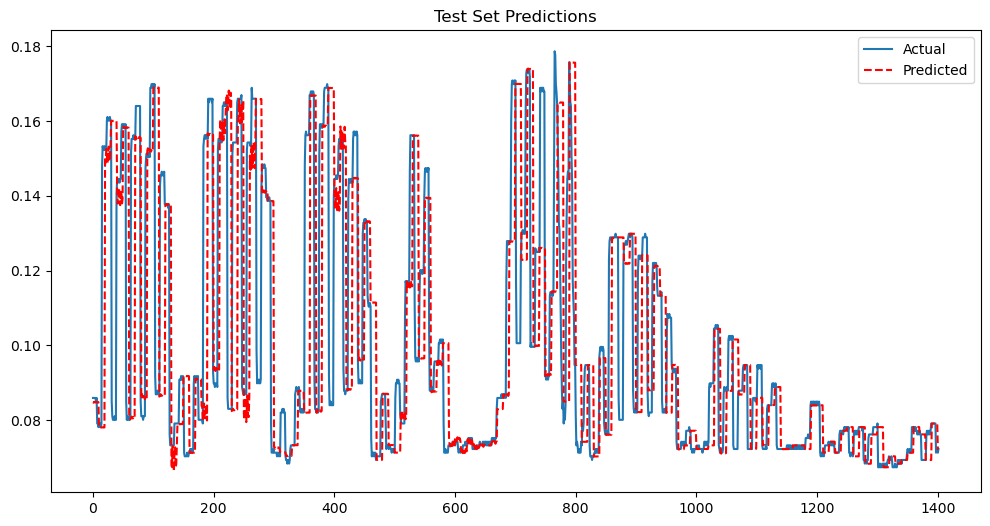

In [156]:
# Plot test predictions vs actual
plt.figure(figsize=(12, 6))
plt.plot(bcc_test, label='Actual')
plt.plot(predictions[:1402], color='red', label='Predicted', linestyle='dashed')
plt.title('Test Set Predictions')
plt.legend()
plt.show()

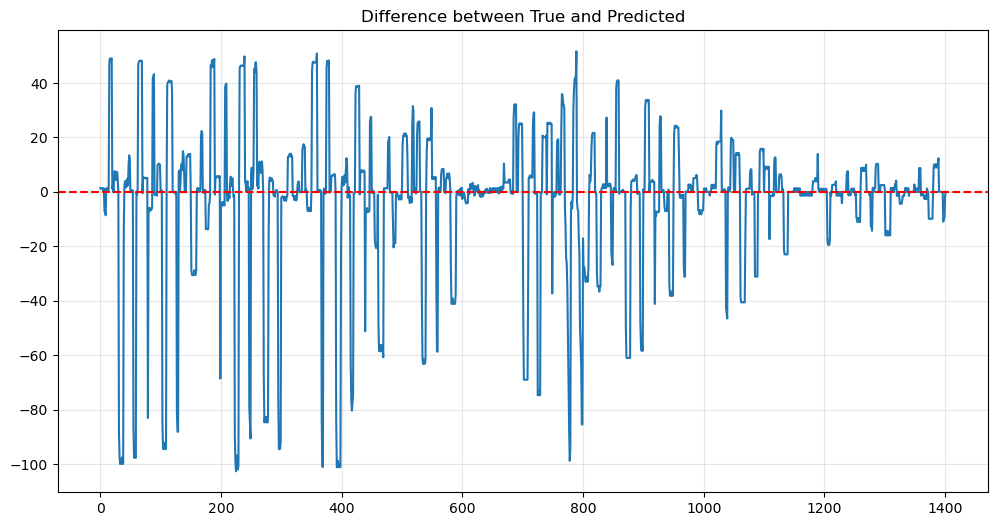

In [175]:
# Plot difference between true and predicted values
plt.figure(figsize=(12, 6))
plt.plot((np.array(bcc_test) - np.array(predictions[:1402]))/np.array(bcc_test)*100)
plt.axhline(np.median((np.array(bcc_test) - np.array(predictions[:1402]))/np.array(bcc_test)*100), color='red', linestyle='dashed', label='Average Error')
plt.title('Difference between True and Predicted')
plt.grid(alpha=0.3)
plt.show()

## Predictive Modelling - CC Data